# Analisis de Chat de WhatsApp Telmito

Hola, gracias por revisar mi cuaderno. Por eso hoy vamos a analizar el chat de whatsapp que solemos usar todos los días. Aquí vamos a utilizar un grupo de chat que es "Grupo universitario de diferentes códigos de la UNI" y en este grupo normalmente intercambiaremos conocimientos que aprendemos, debates, y otros.

Alguna información adicional: este grupo fue creado muchos años atras, a mi me agregaron desde el 4/21/17 hasta ahora. ¡Así que sumergámonos en uno de lo que vamos a descubrir!

# Recuperación de datos

Pero para esta EDA usaremos los datos de whatsapp que todos pueden exportar en su propio grupo de whatsapp. Lo que debe hacer es ir al grupo de WhatsApp y hacer clic en Más y Exportar chat.

### Para este propósito no estoy extraendo los archivos multimiedia

El archivo se descargará en formato .txt

# Preparación y limpieza de datos

# Importar bibliotecas

En este proyecto usaremos algunas bibliotecas únicas como las siguientes:
    
*Regex (re):*
Esta biblioteca se utiliza para extraer y manipular cadenas según patrones específicos.

*Pandas:*
Usaremos pandas para procesar los datos y hacer análisis básicos

*Matlotlib, seaborn y plotly:*
Vamos a utilizar estas bibliotecas como nuestras herramientas para la visualización de datos.

*Emojis:*
Las bibliotecas de Emojis normalmente manejan emojis en el texto. Fue una gran biblioteca para python.

*nube de palabras:*
Esto implica la creación de palabras que están relacionadas con el patrón de la palabra más utilizada.

In [37]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from collections import Counter
import emoji
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS

# Comprensión empresarial y de datos

Antes de comenzar cualquier análisis, debemos comprender el negocio y el lado de los datos.

Comprensión empresarial:

En cualquier proyecto debemos entender qué es exactamente lo que queremos averiguar en este proyecto.
¿Este análisis nos ayuda a lograr el objetivo comercial?

### Comprensión de datos

Aquí podemos ver que hay 5 columnas en el conjunto de datos.
El conjunto de datos contiene fecha, texto y un valor de NaN
Usando info (), podemos saber que la fila de cada objeto no está balanceada porque hay un mensaje de 37k pero algunas de las columnas solo tienen 324,299,254 y 236.
Después de saber que hay un valor desconocido en el conjunto de datos y una fila de desequilibrio, ahora podemos borrar los datos.

In [110]:
whatsapp_df = pd.read_fwf('Chat de WhatsApp con Quiero ser Telmito.txt', header = None)

whatsapp_df.head()

0     1        2    3  \
0  13/02/20 5:56 pm - Los mensajes y las llamadas...  para  obtener  más   
1  21/04/17 1:25 pm - ‎+51 933 011 132 creó el gr...   NaN      NaN  NaN   
2  13/02/20 5:56 pm - Te uniste usando el enlace ...   NaN      NaN  NaN   
3  13/02/20 6:05 pm - ‎David Agapito se unió usan...   NaN      NaN  NaN   
4  13/02/20 6:10 pm - ‎Jessica UNI (I1) se unió u...   NaN      NaN  NaN   

              4  
0  información.  
1           NaN  
2           NaN  
3           NaN  
4           NaN

In [111]:
whatsapp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37658 entries, 0 to 37657
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       37461 non-null  object
 1   1       324 non-null    object
 2   2       299 non-null    object
 3   3       254 non-null    object
 4   4       236 non-null    object
dtypes: object(5)
memory usage: 1.4+ MB


In [112]:
whatsapp_df.shape

(37658, 5)

In [113]:
# Conviertimos el archivo de texto del registro de chat de WhatsApp en un marco de datos de Pandas.

def txtProcesa(txt_file):    
    # algunas expresiones regulares para tener en cuenta los mensajes que ocupan varias líneas

    pat = re.compile(r'^(\d\d\/\d\d\/\d\d.*?)(?=^^\d\d\/\d\d\/\d\d|\Z)', re.S | re.M)
    with open(txt_file) as file:
        data = [m.group(1).strip().replace('\n', ' ') for m in pat.finditer(file.read())]

    usuario     = []; 
    mensaje  = []; 
    fecha = []
    
    for row in data:

        # marca de tiempo antes del primer guión
        fecha.append(row.split(' - ')[0])

        # el usuario está entre am / pm, guión y dos puntos
        try:
            s = re.search('m - (.*?):', row).group(1)
            usuario.append(s)
        except:
            usuario.append('')

        # el contenido del mensaje está después de los primeros dos puntos
        try:
            mensaje.append(row.split(': ', 1)[1])
        except:
            mensaje.append('')

    df = pd.DataFrame(zip(fecha, usuario, mensaje), columns=['fecha', 'usuario', 'mensaje'])
    df['fecha'] = pd.to_datetime(df.fecha, format='%d/%m/%y %I:%M %p')
    # Y: 2020
    # y:20

    # eliminar eventos no asociados con un usuario
    df = df[df.usuario != ''].reset_index(drop=True)
    
    return df

whatsapp_df = txtProcesa('Chat de WhatsApp con Quiero ser Telmito.txt')

In [114]:
# Número de datos de imagen, stickers, media, audio
img = whatsapp_df[whatsapp_df['mensaje'] == "<Multimedia omitido>" ]
img.shape

(4034, 3)

In [115]:
# Soltaremos todo el archivo de imagen usando las funciones Soltar
whatsapp_df.drop(img.index, inplace=True)

In [116]:
whatsapp_df.head(10)

fecha           usuario  \
8  2020-02-14 06:47:00  Raul Llerena P&G   
10 2020-02-14 07:45:00   +51 956 784 664   
12 2020-02-14 08:16:00   +51 981 544 753   
14 2020-02-14 08:22:00             Frank   
15 2020-02-14 08:22:00             Frank   
16 2020-02-14 09:48:00   +51 918 957 759   
17 2020-02-14 09:48:00   +51 947 474 574   
18 2020-02-14 09:48:00   +51 944 407 031   
19 2020-02-14 09:48:00   +51 943 289 257   
22 2020-02-14 09:50:00   +51 918 957 759   

                                              mensaje  
8   Habra team CCAT en la pichanga asi como para j...  
10           Si no tienes team no juegas, verdad? :'v  
12                                  Ahí si provoca ir  
14                                       @51954930945  
15                            Más pollada para vender  
16                   Yo quiero entrar al team CCAT xd  
17                                                Ban  
18                                   @51954930945  xd  
19                                               🤣🤣🤣🤣  
22           En este grupo el presi no tiene poder xd

In [117]:
whatsapp_df.reset_index(inplace=True, drop=True)
whatsapp_df.shape

(25280, 3)

In [156]:
# Soltaremos todo el archivo de imagen usando las funciones Soltar
totalNumberofMessage = whatsapp_df.mensaje.count()
usuario   = whatsapp_df["usuario"].unique() #unique es una función que puede encontrar los elementos únicos de una matriz

print('El total del número de mensajes:',totalNumberofMessage)
print('Nombre de usuario que participa en el chat:', usuario)

El total del número de mensajes: 25280
Nombre de usuario que participa en el chat: ['Raul Llerena P&G' '+51 956 784 664' '+51 981 544 753' 'Frank'
 '+51 918 957 759' '+51 947 474 574' '+51 944 407 031' '+51 943 289 257'
 '+51 985 898 996' '+51 935 145 549' '+51 933 011 132' 'Maribel Mi Banco'
 '+51 954 930 945' '+51 948 669 640' '+51 991 917 999' '+51 941 380 769'
 '+51 923 356 297' '+51 995 147 390' '+51 977 721 018' '+51 980 592 148'
 'Jhasury Ordóñez Gomez FIIS' '+51 979 548 041' '+51 933 485 517'
 '+51 921 868 459' '+51 997 927 782' '+51 972 089 697' '+51 968 876 066'
 '+51 941 059 549' 'Jessica UNI (I1)' 'Betsy' '+51 933 654 709'
 'Ely Márquez I1' '+51 991 318 381' '+51 956 375 477' 'Jaime I2'
 '+51 959 040 764' '+51 978 899 647' '+51 975 622 252' 'Derek'
 '+51 994 696 306' '+51 981 526 155' '+51 951 739 250' '+51 991 422 834'
 '+51 993 216 540' '+51 943 402 004' '+51 962 751 022' '+51 921 411 141'
 'Sofía UNI (I1)' '+51 973 185 203' '+51 938 724 151' 'Iván Pavón'
 '+51 982 091 35

In [160]:
#Creando un nuevo marco de datos copiando el antiguo marco de datos
whatsapp_df1 = whatsapp_df.copy()
whatsapp_df1['Numero_Mensajes'] = [1]* whatsapp_df1.shape[0]
whatsapp_df1.drop(columns = 'fecha', inplace = True)

# Estan agrupados por usuario y los mensajes juntos, luego usaremos count() para contar los mensajes para cada usuario
whatsapp_df1 = whatsapp_df1.groupby('usuario')['Numero_Mensajes'].count().sort_values(ascending = False).reset_index() 
whatsapp_df1

usuario  Numero_Mensajes
0    +51 933 011 132             6028
1    +51 995 147 390             3944
2    +51 985 898 996             3621
3    +51 977 721 018             1455
4   Raul Llerena P&G              850
..               ...              ...
66   +51 943 402 004                1
67   +51 948 430 069                1
68   +51 972 089 697                1
69   +51 992 536 894                1
70   +51 973 944 699                1

[71 rows x 2 columns]

In [161]:
# Uso de seaborn para estilos
sns.set_style("darkgrid")

# Cambiar el tamaño de la figura
plt.figure(figsize=(12, 9))

# Aquí estamos trazando el gráfico de líneas usando plt.plot
plt.plot(whatsapp_df1.usuario, whatsapp_df1.Numero_Mensajes, 'o--c')  

# Aquí estamos escribiendo las etiquetas y el título para el gráfico de la trama
plt.xlabel('Usuarios')
plt.ylabel('Total número de mensajes')

plt.title("La mayor cantidad de mensajes enviados por el usuario")
plt.legend(['Mensajes enviados']);

In [162]:
# Estilos
sns.set_style("darkgrid")

# Fondo del gráfico
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (20, 9)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
fig, ax = plt.subplots()

# Creamos el diagrama de barras
sns.barplot(whatsapp_df1.usuario,whatsapp_df1.Numero_Mensajes,
            #hue='usuario',
            data=whatsapp_df1,dodge=False,palette="CMRmap")

#Config nombre barra
plt.title("La mayor cantidad de mensajes")

# Cambiar el ancho de la gráfica del gráfico de barras
def cambiar_ancho(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # cambiamos el ancho de la barra
        patch.set_width(new_value)

        # volvemos a centrar la barra
        patch.set_x(patch.get_x() + diff * .5)

cambiar_ancho(ax, .35)
plt.show()

C:\Users\ED\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



In [163]:
# Copiamos el dataset
whatsapp_df2 = whatsapp_df.copy()

# Contamos el número de emogis
emoji_ctr = Counter()
emojis_list = map(lambda x: ''.join(x.split()), 
                  emoji.UNICODE_EMOJI.keys()) # La clase UNICODE_EMOJI tiene un código emoji dentro
r = re.compile('|'.join(re.escape(p) for p in emojis_list))
for idx, row in whatsapp_df2.iterrows():
    # findall() es una función para expresiones regulares que ayudan a encontrar coincidencias 
    emojis_found = r.findall(row["mensaje"]) 
    for emoji_found in emojis_found:
        emoji_ctr[emoji_found] += 1
   

In [164]:
# Esto ayudará a crear o renderizar el emoji.
emojis_df = pd.DataFrame() # La razón para usar pd.dataframe es que queremos poner emojis_df en las tablas de marcos de datos
emojis_df['emoji'] = [''] * 10
emojis_df['Numero_emogis'] = [0] * 10

i = 0
for item in emoji_ctr.most_common(10):
    emojis_df.emoji[i] = item[0]
    emojis_df.Numero_emogis[i] = int(item[1])
  
    i += 1

emojis_df

C:\Users\ED\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ED\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



emoji  Numero_emogis
0     🤣            699
1     😂            492
2     🤔            421
3     🥺            214
4     🤭            176
5     👀            162
6     🏻            132
7     🙌            120
8     😲            117
9     🔥             90

In [165]:
# Este gráfico circular nos da ideas e ideas sobre qué emoji usan más
fig = px.pie(emojis_df, values='Numero_emogis', names='emoji',title='Porcentaje de emoji utilizado en el grupo de chat')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [166]:
# Ahora queremos saber qué emoji es el que más usa cada uno de los usuarios. 
# Pero dado que los primeros resultados solo crean
# emoji y number_emoji en el marco de datos ahora necesitamos crear un marco
# de datos que contenga el usuario y el emojio que usan
whatsapp_df2.head()

emojictr = Counter()
emojis_list = map(lambda x: ''.join(x.split()), emoji.UNICODE_EMOJI.keys())
r = re.compile('|'.join(re.escape(p) for p in emojis_list))
for idx, row in whatsapp_df2.iterrows():
    emojis_found = r.findall(row["mensaje"])
    for emoji_found in emojis_found:
        emoji_ctr[emoji_found] += 1

In [167]:
emojis_df = whatsapp_df2

emojis_df['emoji'] = [''] * 25280 # Cambio de valores largos
emojis_df['Numero_emogis'] = [0] * 25280

i = 0
for item in emoji_ctr.most_common(25280):
    emojis_df.emoji[i] = item[0]
    emojis_df.Numero_emogis[i] = int(item[1])
  
    i += 1

emojis_df

C:\Users\ED\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\ED\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



fecha           usuario  \
0     2020-02-14 06:47:00  Raul Llerena P&G   
1     2020-02-14 07:45:00   +51 956 784 664   
2     2020-02-14 08:16:00   +51 981 544 753   
3     2020-02-14 08:22:00             Frank   
4     2020-02-14 08:22:00             Frank   
...                   ...               ...   
25275 2021-04-23 21:09:00   +51 933 011 132   
25276 2021-04-23 21:09:00   +51 995 147 390   
25277 2021-04-23 21:20:00   +51 991 662 300   
25278 2021-04-23 21:20:00   +51 991 662 300   
25279 2021-04-24 00:25:00   +51 948 669 640   

                                                 mensaje emoji  Numero_emogis  
0      Habra team CCAT en la pichanga asi como para j...     🤣           1398  
1               Si no tienes team no juegas, verdad? :'v     😂            984  
2                                      Ahí si provoca ir     🤔            842  
3                                           @51954930945     🥺            428  
4                                Más pollada para vender     🤭            352  
...                                                  ...   ...            ...  
25275                               Le pase tus contacts                    0  
25276                                                Oka                    0  
25277  Pasen por acá, en caso alguien más pueda neces...                    0  
25278                                                🥺☹️                    0  
25279  https://twitter.com/noticiAmerica/status/13855...                    0  

[25280 rows x 5 columns]

In [168]:
l = emojis_df.usuario.unique()
for i in range(len(l)):
    dummy_df = emojis_df[emojis_df['usuario'] == l[i]]
    emojis_list = list([a for b in dummy_df.emoji for a in b])
    emoji_dict = dict(Counter(emojis_list))
    emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
    print('Emoji Distribution for', l[i])
    user_emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
    fig = px.pie(user_emoji_df, values='count', names='emoji')
    fig.update_traces(textposition='inside', textinfo='percent+label')
    fig.show()

Emoji Distribution for Raul Llerena P&G


Emoji Distribution for +51 956 784 664


Emoji Distribution for +51 981 544 753


Emoji Distribution for Frank


Emoji Distribution for +51 918 957 759


Emoji Distribution for +51 947 474 574


Emoji Distribution for +51 944 407 031


Emoji Distribution for +51 943 289 257


Emoji Distribution for +51 985 898 996


Emoji Distribution for +51 935 145 549


Emoji Distribution for +51 933 011 132


Emoji Distribution for Maribel Mi Banco


Emoji Distribution for +51 954 930 945


Emoji Distribution for +51 948 669 640


Emoji Distribution for +51 991 917 999


Emoji Distribution for +51 941 380 769


Emoji Distribution for +51 923 356 297


Emoji Distribution for +51 995 147 390


Emoji Distribution for +51 977 721 018


Emoji Distribution for +51 980 592 148


Emoji Distribution for Jhasury Ordóñez Gomez FIIS


Emoji Distribution for +51 979 548 041


Emoji Distribution for +51 933 485 517


Emoji Distribution for +51 921 868 459


Emoji Distribution for +51 997 927 782


Emoji Distribution for +51 972 089 697


Emoji Distribution for +51 968 876 066


Emoji Distribution for +51 941 059 549


Emoji Distribution for Jessica UNI (I1)


Emoji Distribution for Betsy


Emoji Distribution for +51 933 654 709


Emoji Distribution for Ely Márquez I1


Emoji Distribution for +51 991 318 381


Emoji Distribution for +51 956 375 477


Emoji Distribution for Jaime I2


Emoji Distribution for +51 959 040 764


Emoji Distribution for +51 978 899 647


Emoji Distribution for +51 975 622 252


Emoji Distribution for Derek


Emoji Distribution for +51 994 696 306


Emoji Distribution for +51 981 526 155


Emoji Distribution for +51 951 739 250


Emoji Distribution for +51 991 422 834


Emoji Distribution for +51 993 216 540


Emoji Distribution for +51 943 402 004


Emoji Distribution for +51 962 751 022


Emoji Distribution for +51 921 411 141


Emoji Distribution for Sofía UNI (I1)


Emoji Distribution for +51 973 185 203


Emoji Distribution for +51 938 724 151


Emoji Distribution for Iván Pavón


Emoji Distribution for +51 982 091 353


Emoji Distribution for +51 986 902 604


Emoji Distribution for +51 993 784 931


Emoji Distribution for +51 970 870 599


Emoji Distribution for +51 977 767 076


Emoji Distribution for +51 953 299 403


Emoji Distribution for +51 961 434 993


Emoji Distribution for +51 944 327 773


Emoji Distribution for +51 947 039 700


Emoji Distribution for +51 973 944 699


Emoji Distribution for Juan Carlos I2


Emoji Distribution for +51 986 950 303


Emoji Distribution for +51 962 314 258


Emoji Distribution for +51 991 662 300


Emoji Distribution for +51 953 008 067


Emoji Distribution for +51 947 444 334


Emoji Distribution for +51 992 536 894


Emoji Distribution for +51 944 920 518


Emoji Distribution for +51 944 487 152


Emoji Distribution for +51 948 430 069


In [179]:
# Copiar un marco de datos
whatsapp_df3 = whatsapp_df.copy()

whatsapp_df3['Numero_Mensajes'] = [1] * whatsapp_df3.shape[0]

whatsapp_df3['hours'] = whatsapp_df3['fecha'].apply(lambda x: x.hour)

time_df = whatsapp_df3.groupby('hours').count().reset_index().sort_values(by = 'hours')


time_df



hours  fecha  usuario  mensaje  Numero_Mensajes
0       0    905      905      905              905
1       1    171      171      171              171
2       2    134      134      134              134
3       3     11       11       11               11
4       4     13       13       13               13
5       5      2        2        2                2
6       6     14       14       14               14
7       7     69       69       69               69
8       8    351      351      351              351
9       9    662      662      662              662
10     10   1668     1668     1668             1668
11     11   1849     1849     1849             1849
12     12   1947     1947     1947             1947
13     13   1536     1536     1536             1536
14     14   1672     1672     1672             1672
15     15   1221     1221     1221             1221
16     16   1118     1118     1118             1118
17     17   1377     1377     1377             1377
18     18   1275     1275     1275             1275
19     19   1856     1856     1856             1856
20     20   2432     2432     2432             2432
21     21   1717     1717     1717             1717
22     22   1515     1515     1515             1515
23     23   1765     1765     1765             1765

C:\Users\ED\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:title={'center':'Hora más activa en whatsapps'}, xlabel='hours', ylabel='Numero_Mensajes'>

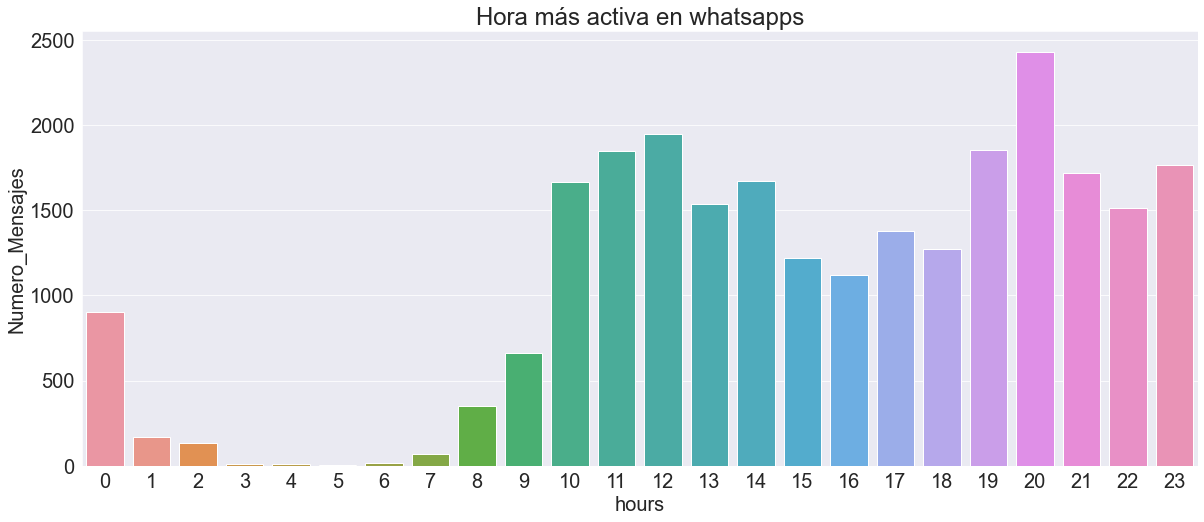

In [180]:
# Crear el formato del gráfico
matplotlib.rcParams['font.size'] = 20
matplotlib.rcParams['figure.figsize'] = (20, 8)


# Usamos seaborn estilos
sns.set_style("darkgrid")

plt.title('Hora más activa en whatsapps');
sns.barplot(time_df.hours,time_df.Numero_Mensajes,data = time_df,dodge=False)

In [171]:
whatsapp_df4 = whatsapp_df.copy()
whatsapp_df4['Numero_Mensajes'] = [1] * whatsapp_df4.shape[0]

whatsapp_df4['month'] = whatsapp_df4['fecha'].apply(lambda x: x.month)  

df_month = whatsapp_df4.groupby('month')['Numero_Mensajes'].count().sort_values(ascending = False).reset_index()
df_month.head()

month  Numero_Mensajes
0      3             5271
1     11             5215
2      4             4943
3      2             2950
4      6             1417

Text(0.5, 1.0, '¿Mes que tiene los mensajes más altos y el mes más ocupado?')

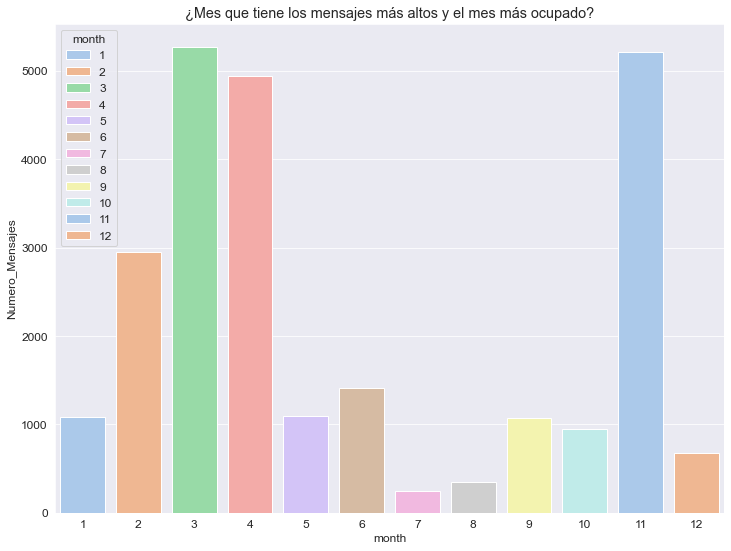

In [172]:
#Formating
sns.set_style("darkgrid")

#The background of the chart
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (12, 9)
matplotlib.rcParams['figure.facecolor'] = '#00000000'
fig, ax = plt.subplots()

#Creating a bar chart
sns.barplot(x=df_month.month,y=df_month.Numero_Mensajes ,hue='month',data=df_month,dodge=False,palette="pastel")
plt.title("¿Mes que tiene los mensajes más altos y el mes más ocupado?")

In [173]:
whatsapp_df5 = whatsapp_df.copy()

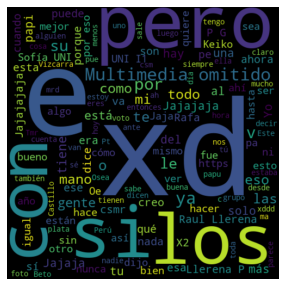

In [174]:
# Se revisará cada palabra del mensaje
word = " ".join(review for review in whatsapp_df5.mensaje)

stopwords = set(STOPWORDS)

# eliminar la palabra / texto que se usa comúnmente (por ejemplo, el, sí, no, adiós o y es)
stopwords.update(["de","que","él","el","la","en","y","pm","am","lo","se",
                  "un","para"])

#Creando una nube de palabras
wordcloud = WordCloud(width = 500, height =500 ,stopwords=stopwords, 
                      background_color="black",min_font_size = 10).generate(word)

plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



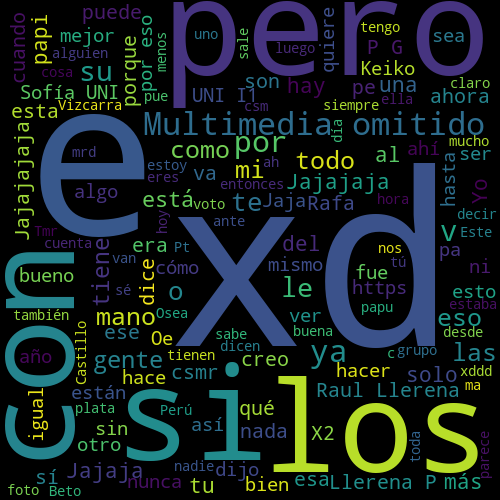

In [175]:
wordcloud.to_image()

In [176]:
# Instalando librerías

In [177]:
"""conda install -c conda-forge wordcloud
conda install -c conda-forge/label/cf202003 emoji
conda install -c plotly plotly
conda install -c conda-forge emoji"""

'conda install -c conda-forge wordcloud\nconda install -c conda-forge/label/cf202003 emoji\nconda install -c plotly plotly\nconda install -c conda-forge emoji'

In [178]:
# Referencias:
# https://regex101.com/r/yS5fU8/2